In [1]:
#Read in all of the relevant libraries
import numpy as np
import pandas as pd  #Pandas is a nice package for data reading/selection
import math
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pickle
import seaborn
seaborn.set_style('ticks')
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

This notebook is for postprocessing the large numbers of simulations we run with the metapopulations code. It takes a list of file names, reads in those simulations, then can calculate various quantities from those simulations to generate output figures. 

In [2]:
#Take a list of files to generate an output for that list. Will be nxm long, where n and m are the number of sims
#for each of the parameters you've looped over (need to tell it n and m)You'll need to set up the filenames so that 
#they actually go in the order you want. 
filenames = pd.read_csv('../Sims/alpha10c0.1/filelist.txt',delim_whitespace=True,header=None)
n = 10  #points along first parameter
m = 10  #points along second parameter

In [3]:
#Getting the file names in a workable format
filemat = filenames.as_matrix()
filemat = filemat.flatten()
npoint = len(filemat)/4
filemat = filemat.reshape([4,npoint])


/Users/laurasampson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
#'toplot' is the variable that you'll be calculating in order to generate a color map. 
#toplot = 'Ipercent' #Percentage of pop. (TOTAL) infected over course of simulation
toplot = 'nhigh'  #Number of patches that have 'high' infection - defined as greater than 5% of the pop.
#set up a matrix to hold the values of this variable:
plotmat = np.zeros([n,m])

In [5]:
#Select the subset of files you're going to work with (mostly for testing purposes):
files_subset = []
for i in range(n):
    files_subset.append(filemat[:,n*m*i:n*m*(i+1)])

#files_subset now contains nxm (x4, since there are I,S,R,and V files for each sim) 
#files for each of 10 different vaccination variance levels. If you want to make a grid looping over vacc. variance,
#you'll have to change the code quite a bit.

In [8]:
#Select all files with the same vacc. variance.
files = files_subset[4]
print np.shape(files)
print files[0,0]
burnin = 800

(4, 100)
cases_vaxvar0.194444444444_popvar0.01_pop100000.0_0.csv


In [9]:
#This loop reads through all of the files and calculates the output variable, storing it in the plotmat matrix.
for i in range(n):
    print i
    for j in range(m):
        #Read in data file
        filenum = i*n+j%m
        print files[0,filenum]
        Ifile = pd.read_csv('../Sims/alpha10c0.1/'+files[0,filenum], delim_whitespace=True,header=0)
        Sfile = pd.read_csv('../Sims/alpha10c0.1/'+files[1,filenum], delim_whitespace=True,header=0)
        Rfile = pd.read_csv('../Sims/alpha10c0.1/'+files[2,filenum], delim_whitespace=True, header=0)
        Vfile = pd.read_csv('../Sims/alpha10c0.1/'+files[3,filenum], delim_whitespace=True,header=0)
        
        Idata_all = Ifile.as_matrix()
        Sdata_all = Sfile.as_matrix()
        Rdata_all = Rfile.as_matrix()
        Vdata_all = Vfile.as_matrix()
                
        Idata_all = Idata_all.astype(float)
        Sdata_all = Sdata_all.astype(float)
        Rdata_all = Rdata_all.astype(float)
        Vdata_all = Vdata_all.astype(float)
        
        tsteps = len(Idata_all[:,0])
        npatch = len(Idata_all[0,:])
        
        Idata = Idata_all[burnin:,:]
        Sdata = Sdata_all[burnin:,:]
        Rdata = Rdata_all[burnin:,:]
        Vdata = Vdata_all[burnin:,:]
        
        '''print j
        if (j-5)%10==0:
            print files[0,filenum]
            plt.plot(Idata)
            '''
        
        #Outbreaks are identified as any string of more than one time-step during which I>0 in a cell.
        if toplot=='Ipercent':
            outsize = np.zeros(npatch)
            k = 1
            while k<(tsteps-burnin):
                for r in range(npatch):
                    if Idata[k,r] > 0.:
                        if Idata[k-1,r] > 0.:
                            outsize[r] += Idata[k,r]
                k += 1

            totinf = sum(outsize)
            totpop = Idata+Sdata+Rdata+Vdata
            totpop = sum(totpop)
            fracinf = outsize/totpop
            print np.shape(outsize)

            plotmat[i,j] = max(fracinf)

        if toplot=='nhigh':
            nhigh = 0
            k = 0
            while k<(tsteps-burnin):
                Ifrac = Idata[k,:]/(Idata[k,:]+Sdata[k,:]+Rdata[k,:]+Vdata[k,:])
                mask = Ifrac>=0.05
                Ihigh = Ifrac[mask]
                #if len(Ihigh) < 400:
                 #   print Ifrac
                x = Ihigh*1.
                #nhigh += sum(x)
                nhigh += len(x)
                k+=1
            plotmat[i,j] = nhigh
            
        #This is where you'll be adding code to calculate some other quantities of interest

0
cases_vaxvar0.194444444444_popvar0.01_pop100000.0_0.csv


/Users/laurasampson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/Users/laurasampson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/laurasampson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/laurasampson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


cases_vaxvar0.194444444444_popvar0.01_pop50000.0_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop55555.5555556_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop61111.1111111_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop66666.6666667_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop72222.2222222_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop77777.7777778_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop83333.3333333_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop88888.8888889_0.csv
cases_vaxvar0.194444444444_popvar0.01_pop94444.4444444_0.csv
1
cases_vaxvar0.194444444444_popvar0.0311111111111_pop100000.0_0.csv
cases_vaxvar0.194444444444_popvar0.0311111111111_pop50000.0_0.csv
cases_vaxvar0.194444444444_popvar0.0311111111111_pop55555.5555556_0.csv
cases_vaxvar0.194444444444_popvar0.0311111111111_pop61111.1111111_0.csv
cases_vaxvar0.194444444444_popvar0.0311111111111_pop66666.6666667_0.csv
cases_vaxvar0.194444444444_popvar0.0311111111111_pop72222.2222222_0.csv
cases_vaxvar0.194444444444_popvar0

In [10]:
#Fix the ordering of columns.  i corresponds to popvar, j to popsize. This works for a 10x10 plot
#This is a gross kludge and should be fixed in the above loop instead.
holdcol0 = plotmat[:,0].copy()
holdcol1 = plotmat[:,5].copy()
matrix = plotmat.copy()
matrix[:,0] = holdcol1               #the fifth column should be the first column
matrix[:,5:9] = plotmat[:,6:].copy() #shift the last few columns left
matrix[:,-1] = holdcol0              #last column replaced with first

holdrow0 = matrix[0,:].copy()
holdrow1 = matrix[1,:].copy()
matrix[0,:] = holdrow1
matrix[1,:] = holdrow0

holdcol0 = plotmat[:,0].copy()
matrix = plotmat.copy()
matrix[:,0:-1] = plotmat[:,1:].copy()
matrix[:,-1] = holdcol0

#matrix[0,:] = holdrow1
#matrix[1,:] = holdrow0

/Users/laurasampson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


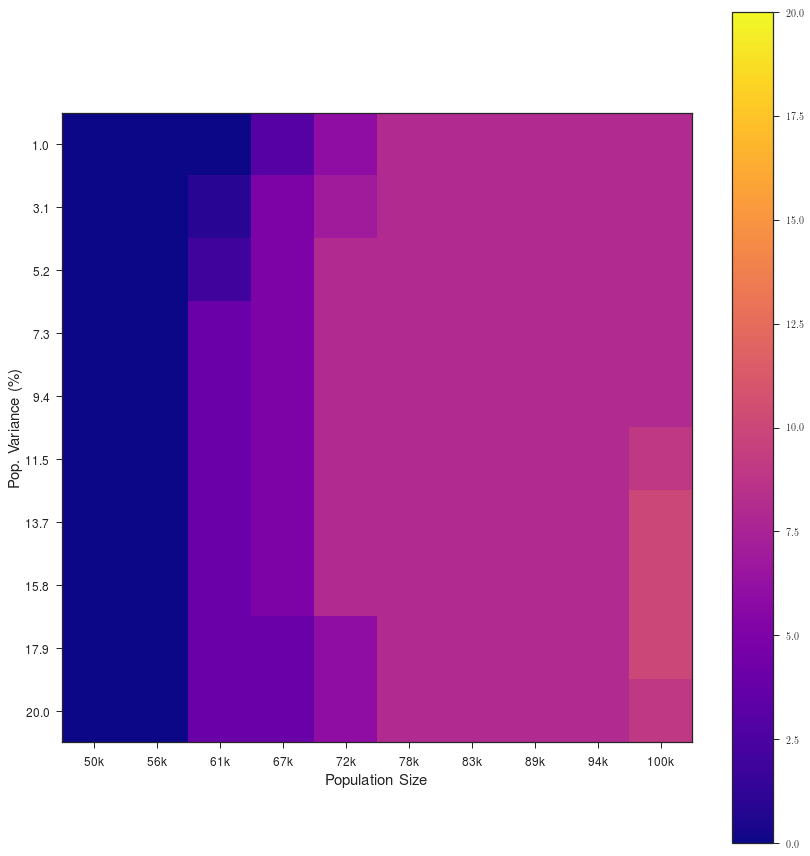

In [11]:
#print out a heatmap of the output variable.
fig, ax = plt.subplots(figsize=(12,12))
cax = ax.imshow((matrix), interpolation='nearest', cmap='plasma',vmin=0.,vmax=20)
ax.set_xticks(np.arange(0,10,1))
ax.set_yticks(np.arange(0,10,1))
ax.set_xticklabels(['50k','56k','61k','67k','72k','78k','83k','89k','94k','100k'],fontsize=12)
ax.set_yticklabels([1.0,3.1,5.2,7.3,9.4,11.5,13.7,15.8,17.9,20.],fontsize=12)
ax.set_xlabel('Population Size',fontsize=15)
ax.set_ylabel('Pop. Variance (\%)',fontsize=15)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
fig.tight_layout()

plt.savefig('../Sims/alpha10c0.1/test.pdf')